<h2>About dataset</h2>

This data set was taken from [kaggle](https://www.kaggle.com/kemical/kickstarter-projects). The dataset logs are related to project submissions sent to the [kickstarter](https://www.kickstarter.com/) platform from 2009 until 2018. Kickstarter is the largest crowdfunding site in the world and seeks to support innovative projects. The site was founded in 2008 by Perry Chen, Yancey Strickler, and Charles Adler.

<h2>Main Objective</h2>

The main objective of this notebook is create classifiers to predict if a project submitted to the kickstater will be approved or not. In addition to checking which classifier has the best results.

The notebook is divided into three main stages:
1. Exploratory data analysis (EDA)
2. Data pre-processing
3. Models creation and predictions


***Importing libraries***


In [211]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ksprojects201801alter2/ks-projects-201801-alter2.csv


***Reading the dataset***

In [212]:
ks_01 = pd.read_csv('/kaggle/input/ksprojects201801alter2/ks-projects-201801-alter2.csv')
ks_01.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,usd_pledged_real,usd_goal_real
0,1,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,2,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,3,1000004038,Where is Hank?,Narrative Film,NaN,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,4,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,5,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


<h2>1. Exploratory data analysis (EDA)<h2>

***Let's start by analyzing our dataset visually by building some graphs.***


Percentage of successful projects: 35.38%
Percentage of failed projects: 52.22%
Percentage of canceled projects: 10.24%


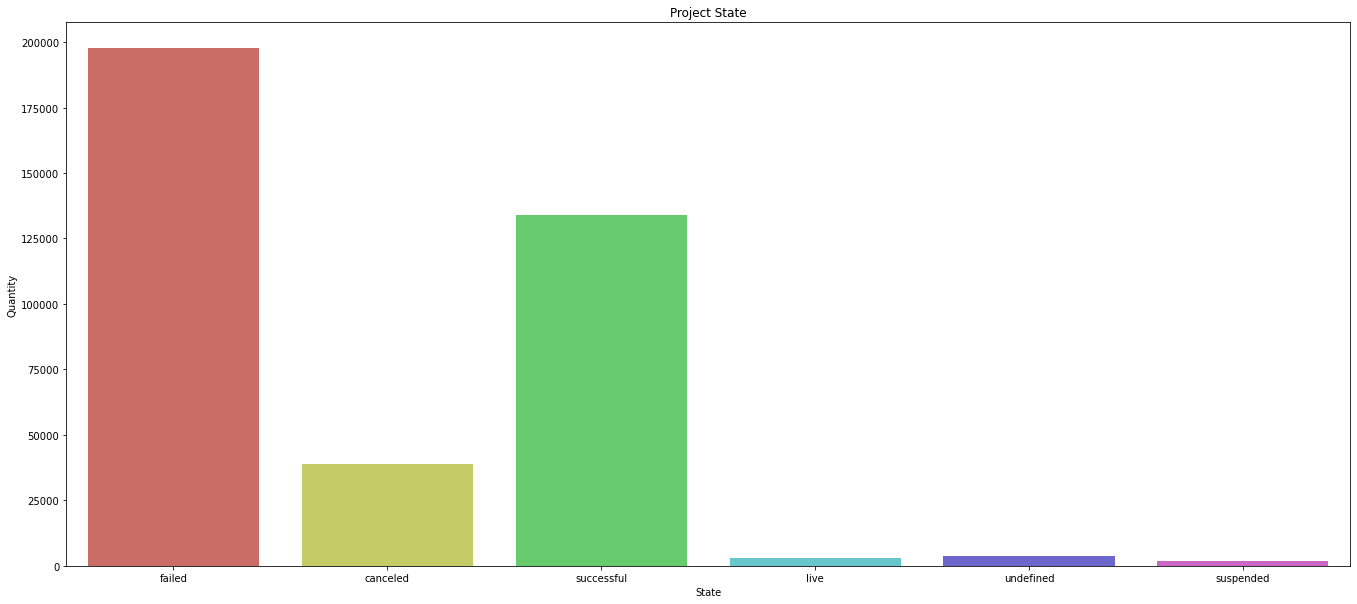

In [213]:
plt.figure(figsize=(23,10))
sns.countplot(ks_01['state'], palette="hls")
plt.xlabel('State')
plt.ylabel('Quantity')
plt.title('Project State')

percentSucess = round(len(ks_01[ks_01['state']=='successful']) / len(ks_01['state']),5)*100
percentFailed = round(len(ks_01[ks_01['state']=='failed']) / len(ks_01['state']),5)*100
percentCanceled = round(len(ks_01[ks_01['state']=='canceled']) / len(ks_01['state']),5)*100

print("Percentage of successful projects: " + "%.2f" %  + percentSucess + "%")
print("Percentage of failed projects: " + "%.2f" %  + percentFailed + "%")
print("Percentage of canceled projects: " + "%.2f" %  + percentCanceled + "%")

**As we can see, 52.22% of the projects were failed, 35.38% were successful, 10.24% were canceled and just over 2% are active or suspended.**


Text(0.5, 1.0, 'Successfull vs. Failed')

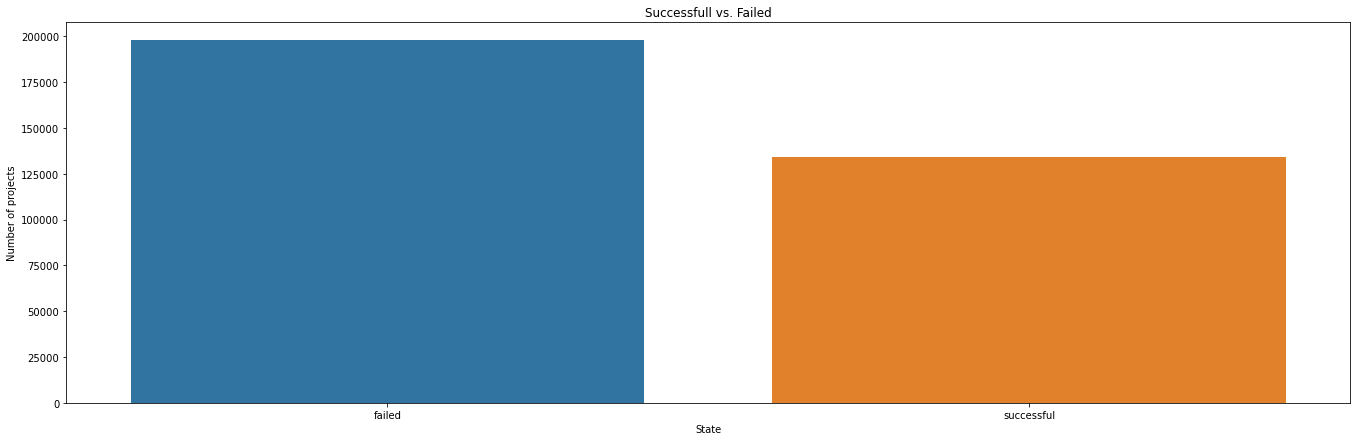

In [214]:
projectsStatus = ks_01[(ks_01.state == 'failed') | (ks_01.state == 'successful')]

projectStatusCount = projectsStatus.state.value_counts()


plt.figure(figsize=(23, 7))
sns.barplot(x=projectStatusCount[:23].index, y=projectStatusCount[:23].values)
plt.ylabel('Number of projects')
plt.xlabel('State')
plt.title('Successfull vs. Failed')

**Now considering only the success and the failed, around 200 thousand projects were failed and just over 125 thousand were successful.**

Text(0.5, 1.0, 'Number of projects / Main category')

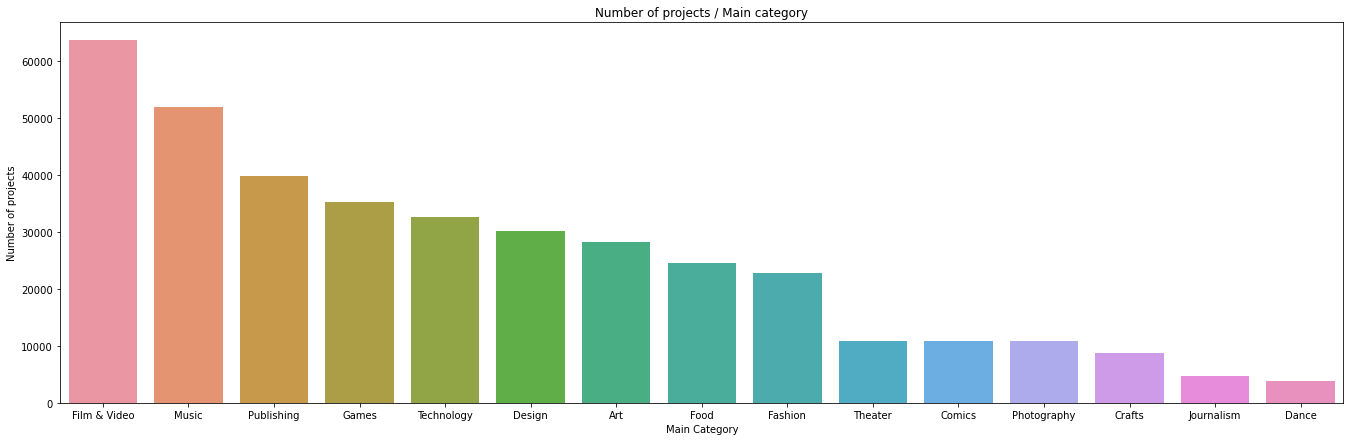

In [215]:
main_categories=ks_01.main_category.value_counts()
plt.figure(figsize=(23, 7))
sns.barplot(x=main_categories[:23].index, y=main_categories[:23].values)
plt.ylabel('Number of projects')
plt.xlabel('Main Category')
plt.title('Number of projects / Main category')

**This graph shows the number of project requests by main category. We noticed that there were more requests for projects in the Film and Video category.**


Text(0.5, 1.0, 'Failed by main category')

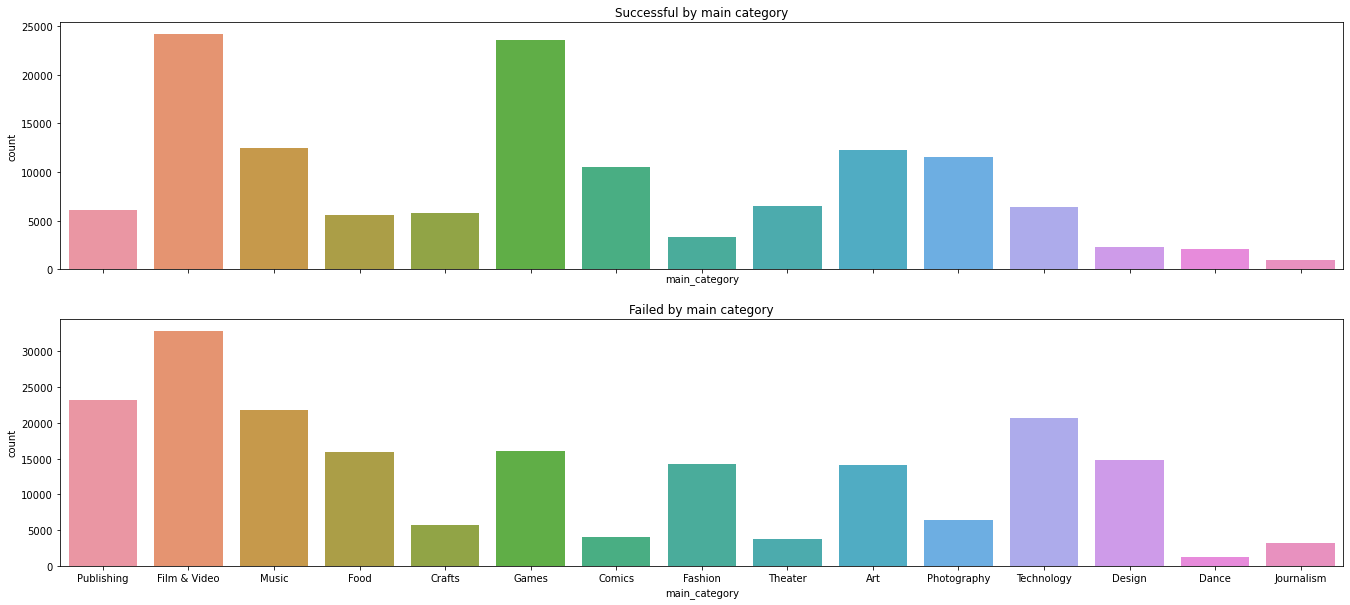

In [216]:
dataSuccess = ks_01[ks_01.state == "successful"]
dataFail = ks_01[ks_01.state == "failed"]

f, axarr = plt.subplots(2,1, figsize=(23, 10), sharex=True)
ax=sns.countplot(dataSuccess.main_category,ax=axarr[0])
ax.set_title("Successful by main category")
ax1=sns.countplot(dataFail.main_category,ax=axarr[1])
ax1.set_title("Failed by main category")

**The chart above illustrates the number of projects approved and reproved by category. The most approved projects were from the Film & Video, Games, Art, Music and Photograph categories. And the most reproved were: Film & Video, Publishing, tecnology and Music.**


Text(0.5, 1.0, 'Number of submissions by countries')

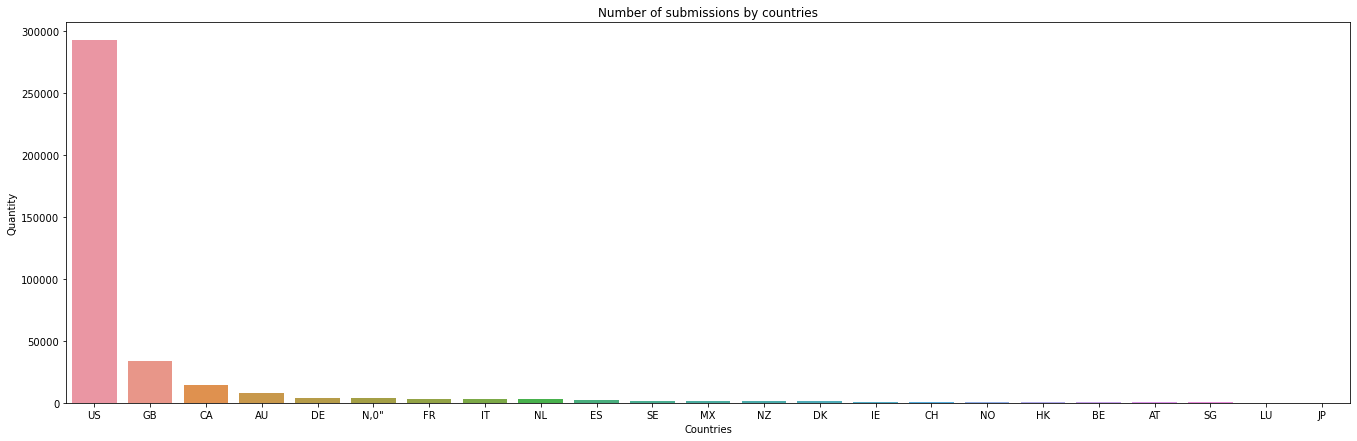

In [217]:
projectsByCountries=ks_01.country.value_counts()
plt.figure(figsize=(23, 7))
sns.barplot(x=projectsByCountries[:23].index, y=projectsByCountries[:23].values)
plt.ylabel('Quantity')
plt.xlabel('Countries')
plt.title('Number of submissions by countries')

**We can see that the majority of project submissions were made by people from the United States.**

Text(0.5, 1.0, 'Number of submissions by year')

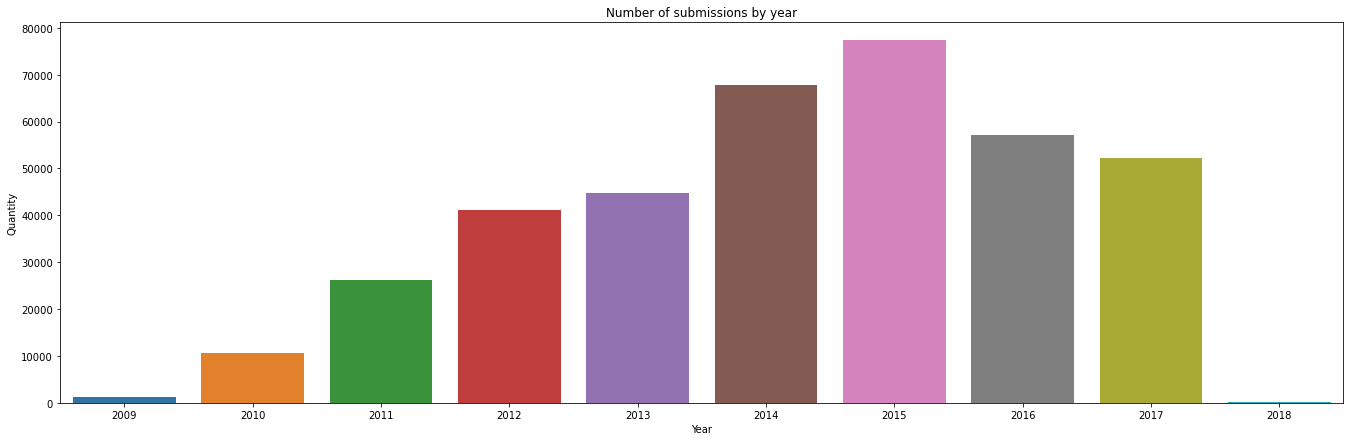

In [218]:
ks_01['launched'] = pd.to_datetime(ks_01['launched'], format="%Y-%m-%d %H:%M:%S")
years = ks_01['launched'].dt.year

projectsByYear=years.value_counts()
plt.figure(figsize=(23, 7))
sns.barplot(x=projectsByYear[:10].index, y=projectsByYear[:10].values)
plt.ylabel('Quantity')
plt.xlabel('Year')
plt.title('Number of submissions by year')

**The graph above shows the number of project submissions per year. We note that 2015 was the peak of submissions.**

<h2><b>2. Data pre-processing</b></h2>

In [219]:
ks_01.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,usd_pledged_real,usd_goal_real
0,1,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,2,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,3,1000004038,Where is Hank?,Narrative Film,NaN,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,4,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,5,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [220]:
ks_01.dtypes

Unnamed: 0                   int64
ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline                    object
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd.pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

**Here we can see the data types of our dataset and note that there are several different types.**


In [221]:
ks_01.nunique()

Unnamed: 0          378661
ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378065
pledged              62130
state                    6
backers               3963
country                 23
usd.pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

**Here we see the quantity of unique data per column.**


**Now we check if our dataset has null or empty data.**


In [222]:
missing_value_count = ks_01.isnull().sum()
print (missing_value_count)

Unnamed: 0             0
ID                     0
name                   4
category               0
main_category         51
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd.pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


**We note that the data set has null data in the name, main_category and usd.pledged columns. We will try to assign values to the missing data.**


In [223]:
ks_01.fillna(method='bfill', axis=0)

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,usd_pledged_real,usd_goal_real
0,1,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,2,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,3,1000004038,Where is Hank?,Narrative Film,Music,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,4,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,5,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,378657,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,378658,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,378659,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,378660,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


**We note that the assignment was successful, but some fields received inconsistent values. We can see in line 2, in the main_category column that the value "Music" has been assigned, but in fact it is a film.**

**Let's try another way. What is the percentage of null values in the dataset?**

In [224]:
total_cells = np.product(ks_01.shape)
total_missing = missing_value_count.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.06357929652116273


**In this case, as the percentage of null values does not reach 1%, we can remove the rows that have missing data without any impact on our data set.**

**We use the dropna () function to remove all lines that have at least one null data.**

In [225]:
ks_01 = ks_01.dropna()
print(ks_01.isnull().sum())

Unnamed: 0          0
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd.pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


**Now we have no more null values in our dataset.**

In [226]:
ks_01 = ks_01[ks_01["state"].isin(["failed", "successful"])]
ks_01[ks_01["state"].isin(["failed", "successful"])]

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,usd_pledged_real,usd_goal_real
0,1,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,2,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
3,4,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
6,7,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,1205.0,1000.00
7,8,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.0,25000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,378655,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.0,154.0,6500.00
378657,378658,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,378659,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,378660,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


**For our classification, only projects with 'succesfull' and 'failed' status are interesting. Therefore, we exclude all projects that have a different status than those mentioned above.**

**The dataset has some columns that contain dates, but we can see that these columns are object type, but when we work with dates, it is more convenient that the columns are datetime type.**

In [227]:
print(ks_01['launched'][40:55])
print(ks_01['deadline'][40:55])

48   2013-06-19 03:16:33
49   2015-11-22 00:00:00
50   2014-01-11 00:57:14
51   2017-09-25 17:17:43
52   2015-04-08 02:53:18
53   2012-04-18 23:34:56
54   2014-05-20 17:18:29
55   2014-09-24 03:35:33
56   2016-01-02 08:06:07
57   2012-02-13 19:00:37
58   2013-09-18 20:20:00
59   2015-05-24 12:47:52
60   2016-04-19 23:53:22
61   2016-09-13 11:59:57
62   2016-05-23 18:10:04
Name: launched, dtype: datetime64[ns]
48    2013-07-19
49    2016-01-02
50    2014-02-05
51    2017-10-30
52    2015-05-08
53    2012-05-13
54    2014-06-19
55    2014-10-23
56    2016-02-01
57    2012-03-26
58    2013-10-18
59    2015-06-23
60    2016-06-18
61    2016-10-13
62    2016-06-22
Name: deadline, dtype: object


In [228]:
ks_01['launched'] = pd.to_datetime(ks_01['launched'], format="%Y-%m-%d %H:%M:%S")
ks_01['deadline'] = pd.to_datetime(ks_01['deadline'], format="%Y-%m-%d")

**We convert the columns from date to datetime using the pandas to_datetime function.**

In [229]:
print(ks_01['launched'][40:55])
print(ks_01['deadline'][40:55])

48   2013-06-19 03:16:33
49   2015-11-22 00:00:00
50   2014-01-11 00:57:14
51   2017-09-25 17:17:43
52   2015-04-08 02:53:18
53   2012-04-18 23:34:56
54   2014-05-20 17:18:29
55   2014-09-24 03:35:33
56   2016-01-02 08:06:07
57   2012-02-13 19:00:37
58   2013-09-18 20:20:00
59   2015-05-24 12:47:52
60   2016-04-19 23:53:22
61   2016-09-13 11:59:57
62   2016-05-23 18:10:04
Name: launched, dtype: datetime64[ns]
48   2013-07-19
49   2016-01-02
50   2014-02-05
51   2017-10-30
52   2015-05-08
53   2012-05-13
54   2014-06-19
55   2014-10-23
56   2016-02-01
57   2012-03-26
58   2013-10-18
59   2015-06-23
60   2016-06-18
61   2016-10-13
62   2016-06-22
Name: deadline, dtype: datetime64[ns]


**Now, we can see that the launched and deadline columns are datetime type.**

**We will now analyze the columns of our dataset and see which ones are not relevant to our classifier.**

In [230]:
print(ks_01.columns)

Index(['Unnamed: 0', 'ID', 'name', 'category', 'main_category', 'currency',
       'deadline', 'goal', 'launched', 'pledged', 'state', 'backers',
       'country', 'usd.pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


In [231]:
ks_01 = ks_01.drop('Unnamed: 0', axis=1)
ks_01 = ks_01.drop('ID', axis=1)
ks_01 = ks_01.drop('name', axis=1)
print(ks_01.columns)

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd.pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


**We noticed that the columns Unnamed: 0, ID and Name have no relevance for solving the problem, so they have been removed.**

**We will now create a new column called duration_days, which has the quantity of duration days of each project.**

In [232]:
ks_01['duration_days'] = ks_01['deadline'].subtract(ks_01['launched'])
ks_01['duration_days'] = ks_01['duration_days'].astype('timedelta64[D]')

In [233]:
ks_01.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,usd_pledged_real,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58.0
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59.0
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29.0
6,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,1205.0,1000.00,19.0
7,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.0,25000.00,44.0


**Now we have a column with information about the projects duration days. Then we can remove the deadline and launched columns.**

In [234]:
ks_01 = ks_01.drop('deadline', axis=1)
ks_01 = ks_01.drop('launched', axis=1)
ks_01.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd.pledged,usd_pledged_real,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,58.0
1,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,59.0
3,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,29.0
6,Food,Food,USD,1000.0,1205.0,successful,16,US,1205.0,1205.0,1000.00,19.0
7,Drinks,Food,USD,25000.0,453.0,failed,40,US,453.0,453.0,25000.00,44.0


In [235]:
encoder = LabelEncoder()

ks_01_one_hot_encoding = pd.get_dummies(ks_01, prefix = [ 'category', 'main_category', 'currency','country'],
                             columns = [ 'category', 'main_category', 'currency','country'])

ks_01_one_hot_encoding['state'] = encoder.fit_transform(ks_01_one_hot_encoding['state'])    
ks_01_one_hot_encoding.head()

,goal,pledged,state,backers,usd.pledged,usd_pledged_real,usd_goal_real,duration_days,category_3D Printing,category_Academic,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0.0,0,0,0.0,0.0,1533.95,58.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,2421.0,0,15,100.0,2421.0,30000.00,59.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,1.0,0,1,1.0,1.0,5000.00,29.0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1000.0,1205.0,1,16,1205.0,1205.0,1000.00,19.0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,25000.0,453.0,0,40,453.0,453.0,25000.00,44.0,0,0,...,0,0,0,0,0,0,0,0,0,1


**We decided to apply one-hot encoding to our data and assign it to a separate dataset called ks_01_one_hot_encoding (just to test the classifier using this technique).**

In [236]:
ks_01.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd.pledged,usd_pledged_real,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,58.0
1,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,59.0
3,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,29.0
6,Food,Food,USD,1000.0,1205.0,successful,16,US,1205.0,1205.0,1000.00,19.0
7,Drinks,Food,USD,25000.0,453.0,failed,40,US,453.0,453.0,25000.00,44.0


In [237]:
for i in ks_01.columns:
    if((i) == "category" or (i) == "main_category" or (i) == "currency" or (i) == "state" or (i) == "country"):
        ks_01[i]=encoder.fit_transform(ks_01[i])

**We apply LabelEncoder to categorical variables in our dataset, transforming the values of those variables into numbers.**

In [238]:
ks_01.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd.pledged,usd_pledged_real,usd_goal_real,duration_days
0,108,12,5,1000.0,0.0,0,0,9,0.0,0.0,1533.95,58.0
1,93,6,13,30000.0,2421.0,0,15,21,100.0,2421.0,30000.00,59.0
3,90,10,13,5000.0,1.0,0,1,21,1.0,1.0,5000.00,29.0
6,58,7,13,1000.0,1205.0,1,16,21,1205.0,1205.0,1000.00,19.0
7,41,7,13,25000.0,453.0,0,40,21,453.0,453.0,25000.00,44.0


**We analyzed our dataset once again and concluded that the variables related to the value collected 'pledged' contain information that can make the model learn patterns that are not of interest, or that already contain the correct result.**

**Ex: The classifier can understand that whenever the pledged value is greater than or equal to the goal, a project is considered a success.**

In [239]:
ks_01 = ks_01.drop('pledged', axis=1)
ks_01 = ks_01.drop('usd_pledged_real', axis=1)
ks_01 = ks_01.drop('usd.pledged', axis=1)


ks_01_one_hot_encoding = ks_01_one_hot_encoding.drop('pledged', axis=1)
ks_01_one_hot_encoding = ks_01_one_hot_encoding.drop('usd_pledged_real', axis=1)
ks_01_one_hot_encoding = ks_01_one_hot_encoding.drop('usd.pledged', axis=1)

**We apply scaling to the usd_goal_real variable to decrease the gap between the values, as methods such as SVN and KNN can consider a large gap between the variables.**

In [240]:
from sklearn.preprocessing import minmax_scale
ks_01['usd_goal_real'] = (minmax_scale(ks_01['usd_goal_real'], feature_range=(0,1)))

In [241]:
ks_01.head()

,category,main_category,currency,goal,state,backers,country,usd_goal_real,duration_days
0,108,12,5,1000.0,0,0,9,0.000009,58.0
1,93,6,13,30000.0,0,15,21,0.000180,59.0
3,90,10,13,5000.0,0,1,21,0.000030,29.0
6,58,7,13,1000.0,1,16,21,0.000006,19.0
7,41,7,13,25000.0,0,40,21,0.000150,44.0


In [242]:
ks_01.describe()

,category,main_category,currency,goal,state,backers,country,usd_goal_real,duration_days
count,331417.000000,331417.00000,331417.000000,3.314170e+05,331417.000000,331417.000000,331417.000000,331417.000000,331417.000000
mean,80.285169,7.48203,11.081511,4.426975e+04,0.403824,116.460526,18.189263,0.000250,32.926932
std,45.080630,3.93201,3.878408,1.118345e+06,0.490664,965.794198,5.815574,0.006668,16.142582
min,0.000000,0.00000,0.000000,1.000000e-02,0.000000,0.000000,0.000000,0.000000,-2416.000000
25%,39.000000,5.00000,13.000000,2.000000e+03,0.000000,2.000000,21.000000,0.000012,29.000000
50%,85.000000,7.00000,13.000000,5.000000e+03,0.000000,15.000000,21.000000,0.000030,29.000000
75%,119.000000,10.00000,13.000000,1.500000e+04,1.000000,63.000000,21.000000,0.000090,35.000000
max,158.000000,14.00000,13.000000,1.000000e+08,1.000000,219382.000000,21.000000,1.000000,2057.000000


**<h2> 3. Models creation and predictions</h2>**

**<h3>3.1 Prediction and accuracy of classifiers using LabelEncoder and Scaling</h3>**

In [243]:
X_train, X_test, y_train, y_test = train_test_split(ks_01.drop('state', axis=1), ks_01['state'], 
                                                    test_size=0.3, random_state=0)

**Decision Tree Classifier**

In [244]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print("Accuracy: " + "%.2f" % (accuracy_score(y_test,predictions)*100) + "%")

Accuracy: 89.98%


**Random Forest Classifier**

In [245]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print("Accuracy: " + "%.2f" % (accuracy_score(y_test,predictions)*100) + "%")

Accuracy: 92.76%


**KNN Classifier**

In [246]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print("Accuracy: " + "%.2f" % (accuracy_score(y_test,predictions)*100) + "%")

Accuracy: 91.41%


**Logistic Regression Classifier**

In [247]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=350)
classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [248]:
features = ['category', 'main_category','currency','goal','backers','country','usd_goal_real','duration_day']
importance = np.abs(classifier.coef_[0])
print("\nFeature importance")
for i in range(len(features)):
    print(features[i] + ": " + str(importance[i]))


Feature importance
category: 0.0011500703101626406
main_category: 0.015269122217172889
currency: 0.0010280551327513747
goal: 0.00014729400204692607
backers: 0.043907643510309444
country: 0.006393804218447417
usd_goal_real: 9.260875848486639e-07
duration_day: 0.018542106178837416


**We can see that the most important feature for our classifier was usd_goal_real, followed by backers, duration_days and main_category.**

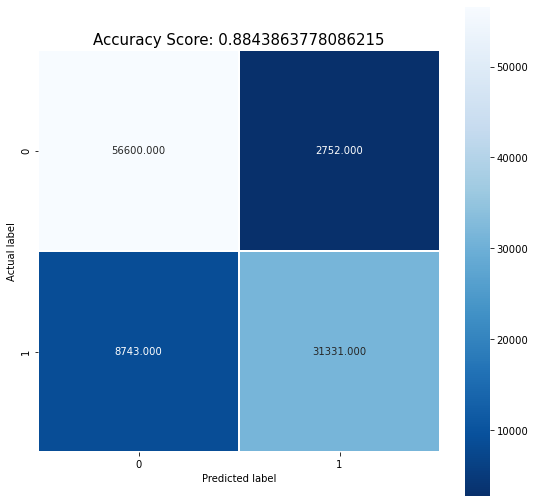

In [249]:
score = accuracy_score(y_test,predictions)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**Here we look at the confusion matrix regarding hits and errors in our prediction.**

In [250]:
print(classification_report(y_test, predictions))
print("Accuracy: " + "%.2f" % (accuracy_score(y_test,predictions)*100) + "%")
print("Precision: " + "%.2f" % (precision_score(y_test,predictions)*100) + "%")
print("Recall: " + "%.2f" % (recall_score(y_test,predictions)*100) + "%")

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     59352
           1       0.92      0.78      0.84     40074

    accuracy                           0.88     99426
   macro avg       0.89      0.87      0.88     99426
weighted avg       0.89      0.88      0.88     99426

Accuracy: 88.44%
Precision: 91.93%
Recall: 78.18%


**Here we observe the classification report with values of accuracy, precision, recall and others.**

<h3><i>We can observe that the classifier with the highest percentage of accuracy was the Random Forest with 92% of correct answers in the predictions.</i></h3>

<h3>3.2 Prediction and accuracy of classifiers using one-hot encoding</h3>

In [251]:
X_train, X_test, y_train, y_test = train_test_split(ks_01_one_hot_encoding.drop('state', axis=1), ks_01_one_hot_encoding['state'], 
                                                    test_size=0.3, random_state=0)

**Decision Tree Classifier**

In [252]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print("Accuracy: " + "%.2f" % (accuracy_score(y_test,predictions)*100) + "%")

Accuracy: 90.32%


**Random Forest Classifier**

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print("Accuracy: " + "%.2f" % (accuracy_score(y_test,predictions)*100) + "%")

**KNN Classifier**

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

print("Accuracy: " + "%.2f" % (accuracy_score(y_test,predictions)*100) + "%")

**Logistic Regression Classifier**

In [ ]:
classifier = LogisticRegression(max_iter=350)
classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [ ]:
importance = np.abs(classifier.coef_[0])
print("\nFeature importance")
for i in range(len(features)):
    print(features[i] + ": " + str(importance[i]))

**We can see that the most important feature for our classifier was category, followed by usd_goal_real, country, duration days and backers**

In [ ]:
score = accuracy_score(y_test,predictions)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**Here we look at the confusion matrix regarding hits and errors in our prediction.**

In [ ]:
print(classification_report(y_test, predictions))
print("Accuracy: " + "%.2f" % (accuracy_score(y_test,predictions)*100) + "%")
print("Precision: " + "%.2f" % (precision_score(y_test,predictions)*100) + "%")
print("Recall: " + "%.2f" % (recall_score(y_test,predictions)*100) + "%")

**Here we observe the classification report with values of accuracy, precision, recall and others.**

<h3><i>We can observe that the classifier that obtained a higher percentage of accuracy was a random forest classifier with 92.63% of correct answers in the predictions.</i></h3>